In [121]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.impute import KNNImputer


In [122]:
df = pd.read_csv("kidney_disease.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [123]:
features = df.columns.tolist()
features.remove('classification')
features.remove('sg')
features.remove('al')
features.remove('su') 
features.remove('id') 


df = df.drop('id',axis=1)
df = df.drop('sg',axis=1)
df = df.drop('al',axis=1)
df = df.drop('su',axis=1)


Aparentemente temos muitas variáveis categóricas. Irei atrás do repositório oficial do dataset para compreender estas variáveis:

1.Age(numerical) <br>
- age in years<br>

2.Blood Pressure(numerical)<br>
- bp in mm/Hg<br>

3.Specific Gravity(nominal)(Urina)<br>  
- sg - (1.005,1.010,1.015,1.020,1.025)<br>

4.Albumin(nominal)<br>
- al - (0,1,2,3,4,5)<br>

5.Sugar(nominal)<br>
- su - (0,1,2,3,4,5)<br>

6.Red Blood Cells(nominal)<br>
- rbc - (normal,abnormal)<br>

7.Pus Cell (nominal)<br>
- pc - (normal,abnormal)<br>

8.Pus Cell clumps(nominal)<br>
- pcc - (present,notpresent)<br>

9.Bacteria(nominal)<br>
- ba  - (present,notpresent)<br>

10.Blood Glucose Random(numerical)		<br>
- bgr in mgs/dl<br>

11.Blood Urea(numerical)	<br>
- bu in mgs/dl<br>

12.Serum Creatinine(numerical)	<br>
- sc in mgs/dl<br>

13.Sodium(numerical)<br>
- sod in mEq/L<br>

14.Potassium(numerical)	<br>
- pot in mEq/L<br>

15.Hemoglobin(numerical)<br>
- hemo in gms<br>

16.Packed  Cell Volume(numerical)<br>
- pcv/(cells by blood ml)<br>

17.White Blood Cell Count(numerical)<br>
- wc in cells/cumm<br>

18.Red Blood Cell Count(numerical)	<br>
- rc in millions/cmm<br>

19.Hypertension(nominal)	<br>
- htn - (yes,no)<br>

20.Diabetes Mellitus(nominal)	<br>
- dm - (yes,no)<br>

21.Coronary Artery Disease(nominal)<br>
- cad - (yes,no)<br>

22.Appetite(nominal)	<br>
- appet - (good,poor)<br>

23.Pedal Edema(nominal)<br>
- pe - (yes,no)	<br>

24.Anemia(nominal)<br>
- ane - (yes,no)<br>

25.Class (nominal)		<br>
- class - (ckd,notckd)<br>

---

As minhas variáveis de interesse são: `age, anemia, wc, rc, hemoglobin, bu, bgr, ba, pcc, bp, al, su, rbc, sc, pot, sod`

In [124]:
df['classification'] = df['classification'].replace('ckd\t','ckd')
df['dm'] = df['dm'].replace('\tyes','yes').replace('\tno','no')
df['cad'] = df['cad'].replace('\tno','no')


dfSemNa = df[features].replace('NaN',np.nan)
dfSemNa = dfSemNa.dropna()
dfSemNa.shape

(159, 21)

In [125]:
itens_f = []
for feature in features:
    sub = df[feature].isna().sum()
    print(f"Feature: {feature} | sub: {sub}")

Feature: age | sub: 9
Feature: bp | sub: 12
Feature: rbc | sub: 152
Feature: pc | sub: 65
Feature: pcc | sub: 4
Feature: ba | sub: 4
Feature: bgr | sub: 44
Feature: bu | sub: 19
Feature: sc | sub: 17
Feature: sod | sub: 87
Feature: pot | sub: 88
Feature: hemo | sub: 52
Feature: pcv | sub: 70
Feature: wc | sub: 105
Feature: rc | sub: 130
Feature: htn | sub: 2
Feature: dm | sub: 2
Feature: cad | sub: 2
Feature: appet | sub: 1
Feature: pe | sub: 1
Feature: ane | sub: 1


In [126]:
dfSemNa.dtypes

age      float64
bp       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv       object
wc        object
rc        object
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [127]:
dfSemNa['pcv'] = dfSemNa.pcv.astype(float)
dfSemNa['rc'] = dfSemNa.rc.astype(float)
dfSemNa['pot'] = dfSemNa.pot.astype(float)
dfSemNa['sod'] = dfSemNa.sod.astype(float)
dfSemNa['wc'] = dfSemNa.wc.astype(float)
dfSemNa['hemo'] = dfSemNa.hemo.astype(float)
dfSemNa['bgr'] = dfSemNa.bgr.astype(float)
dfSemNa['bp'] = dfSemNa.bp.astype(float)
dfSemNa['bu'] = dfSemNa.bu.astype(float)
dfSemNa['sc'] = dfSemNa.sc.astype(float)
dfSemNa.dtypes



age      float64
bp       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wc       float64
rc       float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [128]:
df_preenchimento = df
df_preenchimento[["rc", "wc", "pot", "pcv", "sod", "hemo", "bgr", "bp" , "bu", "sc"]] = df_preenchimento[["rc", "wc", "pot", "pcv", "sod", "hemo", "bgr", "bp" , "bu", "sc"]].apply(pd.to_numeric, errors="coerce")
df_preenchimento

,age,bp,rbc,pc,pcc,ba,bgr,bu,sc,sod,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [129]:
NAs_value = ["rc", "wc", "pot", "pcv", "sod", "hemo", "bgr", "bp" , "bu", "sc"]
NAs_categ = ["pc", "rbc"]

for x in NAs_value:
    df_preenchimento[x].fillna(dfSemNa[x].mean(), inplace=True)
for y in NAs_categ:
    df_preenchimento[y].fillna(dfSemNa[y].mode()[0], inplace=True)

In [130]:
itens_f = []
for feature in features:
    sub = df_preenchimento[feature].isna().sum()
    print(f"Feature: {feature} | sub: {sub}")

Feature: age | sub: 9
Feature: bp | sub: 0
Feature: rbc | sub: 0
Feature: pc | sub: 0
Feature: pcc | sub: 4
Feature: ba | sub: 4
Feature: bgr | sub: 0
Feature: bu | sub: 0
Feature: sc | sub: 0
Feature: sod | sub: 0
Feature: pot | sub: 0
Feature: hemo | sub: 0
Feature: pcv | sub: 0
Feature: wc | sub: 0
Feature: rc | sub: 0
Feature: htn | sub: 2
Feature: dm | sub: 2
Feature: cad | sub: 2
Feature: appet | sub: 1
Feature: pe | sub: 1
Feature: ane | sub: 1


In [131]:
df_preenchimento= df_preenchimento.dropna().reset_index()
df_preenchimento.shape

(384, 23)

In [132]:
display(df_preenchimento)

,index,age,bp,rbc,pc,pcc,ba,bgr,bu,sc,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,normal,normal,notpresent,notpresent,121.000000,36.0,1.2,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,normal,normal,notpresent,notpresent,131.333333,18.0,0.8,...,38.0,6000.0,4.897484,no,no,no,good,no,no,ckd
2,2,62.0,80.0,normal,normal,notpresent,notpresent,423.000000,53.0,1.8,...,31.0,7500.0,4.897484,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,normal,abnormal,present,notpresent,117.000000,56.0,3.8,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,normal,normal,notpresent,notpresent,106.000000,26.0,1.4,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,395,55.0,80.0,normal,normal,notpresent,notpresent,140.000000,49.0,0.5,...,47.0,6700.0,4.900000,no,no,no,good,no,no,notckd
380,396,42.0,70.0,normal,normal,notpresent,notpresent,75.000000,31.0,1.2,...,54.0,7800.0,6.200000,no,no,no,good,no,no,notckd
381,397,12.0,80.0,normal,normal,notpresent,notpresent,100.000000,26.0,0.6,...,49.0,6600.0,5.400000,no,no,no,good,no,no,notckd
382,398,17.0,60.0,normal,normal,notpresent,notpresent,114.000000,50.0,1.0,...,51.0,7200.0,5.900000,no,no,no,good,no,no,notckd


In [146]:
ohe = OneHotEncoder()
categoricas = ['pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'rbc', 'ane', 'classification']
featuresCateg = ohe.fit_transform(df_preenchimento[categoricas]).toarray()
display(featuresCateg)

colunasLabels2 = ohe.categories_
colunasLabels2 = np.array(colunasLabels2).ravel()

display(colunasLabels2)

new_columns = np.array(['pc_abnormal', 'pc_normal', 'pcc_notpresent', 'pcc_present', 'ba_notpresent',
'ba_present', 'htn_no', 'htn_yes', 'dm_no', 'dm_yes', 'cad_no', 'cad_yes', 'appet_good', 'appet_poor',
'pe_no', 'pe_yes', 'rbc_abnormal', 'rbc_normal', 'ane_no', 'ane_yes', 'ckd', 'notckd'])

df_catego = pd.DataFrame(featuresCateg, columns =new_columns)

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.]])

array(['abnormal', 'normal', 'notpresent', 'present', 'notpresent',
       'present', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'good', 'poor',
       'no', 'yes', 'abnormal', 'normal', 'no', 'yes', 'ckd', 'notckd'],
      dtype=object)

In [135]:
final = pd.concat([df_preenchimento,df_catego], axis = 1)
df_final = final.drop(columns = categoricas+["index"], axis = 1)
df_final

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,...,appet_good,appet_poor,pe_no,pe_yes,rbc_abnormal,rbc_normal,ane_no,ane_yes,ckd,notckd
0,48.0,80.0,121.000000,36.0,1.2,138.861635,4.63522,15.4,44.0,7800.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,7.0,50.0,131.333333,18.0,0.8,138.861635,4.63522,11.3,38.0,6000.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,62.0,80.0,423.000000,53.0,1.8,138.861635,4.63522,9.6,31.0,7500.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.50000,11.2,32.0,6700.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,51.0,80.0,106.000000,26.0,1.4,138.861635,4.63522,11.6,35.0,7300.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,55.0,80.0,140.000000,49.0,0.5,150.000000,4.90000,15.7,47.0,6700.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
380,42.0,70.0,75.000000,31.0,1.2,141.000000,3.50000,16.5,54.0,7800.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
381,12.0,80.0,100.000000,26.0,0.6,137.000000,4.40000,15.8,49.0,6600.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
382,17.0,60.0,114.000000,50.0,1.0,135.000000,4.90000,14.2,51.0,7200.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [147]:
display(df_final.dtypes)

age               float64
bp                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
pc_abnormal       float64
pc_normal         float64
pcc_notpresent    float64
pcc_present       float64
ba_notpresent     float64
ba_present        float64
htn_no            float64
htn_yes           float64
dm_no             float64
dm_yes            float64
cad_no            float64
cad_yes           float64
appet_good        float64
appet_poor        float64
pe_no             float64
pe_yes            float64
rbc_abnormal      float64
rbc_normal        float64
ane_no            float64
ane_yes           float64
ckd               float64
dtype: object

In [137]:
new_columns  = new_columns.tolist()
FEATURES = [i for i in features if i not in categoricas] + new_columns
FEATURES = FEATURES[:-2]
TARGET = ['ckd']

In [138]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

df_final[["bp", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wc", "rc"]] = mms.fit_transform(df_final[["bp", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wc", "rc"]])
df_final

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,...,appet_good,appet_poor,pe_no,pe_yes,rbc_abnormal,rbc_normal,ane_no,ane_yes,ckd,notckd
0,48.0,0.230769,0.211538,0.088575,0.010582,0.847707,0.047982,0.836735,0.777778,0.231405,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,7.0,0.000000,0.233618,0.042362,0.005291,0.847707,0.047982,0.557823,0.644444,0.157025,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,62.0,0.230769,0.856838,0.132221,0.018519,0.847707,0.047982,0.442177,0.488889,0.219008,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,48.0,0.153846,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,51.0,0.230769,0.179487,0.062901,0.013228,0.847707,0.047982,0.578231,0.577778,0.210744,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,55.0,0.230769,0.252137,0.121951,0.001323,0.917981,0.053933,0.857143,0.844444,0.185950,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
380,42.0,0.153846,0.113248,0.075738,0.010582,0.861199,0.022472,0.911565,1.000000,0.231405,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
381,12.0,0.230769,0.166667,0.062901,0.002646,0.835962,0.042697,0.863946,0.888889,0.181818,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
382,17.0,0.076923,0.196581,0.124519,0.007937,0.823344,0.053933,0.755102,0.933333,0.206612,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [139]:
df_final = df_final.reindex(FEATURES + TARGET, axis=1)
df_final = df_final.dropna()  
df_final

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,...,cad_yes,appet_good,appet_poor,pe_no,pe_yes,rbc_abnormal,rbc_normal,ane_no,ane_yes,ckd
0,48.0,0.230769,0.211538,0.088575,0.010582,0.847707,0.047982,0.836735,0.777778,0.231405,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,7.0,0.000000,0.233618,0.042362,0.005291,0.847707,0.047982,0.557823,0.644444,0.157025,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,62.0,0.230769,0.856838,0.132221,0.018519,0.847707,0.047982,0.442177,0.488889,0.219008,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,48.0,0.153846,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,51.0,0.230769,0.179487,0.062901,0.013228,0.847707,0.047982,0.578231,0.577778,0.210744,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,55.0,0.230769,0.252137,0.121951,0.001323,0.917981,0.053933,0.857143,0.844444,0.185950,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
380,42.0,0.153846,0.113248,0.075738,0.010582,0.861199,0.022472,0.911565,1.000000,0.231405,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
381,12.0,0.230769,0.166667,0.062901,0.002646,0.835962,0.042697,0.863946,0.888889,0.181818,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
382,17.0,0.076923,0.196581,0.124519,0.007937,0.823344,0.053933,0.755102,0.933333,0.206612,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [140]:
df_finalNP = df_final.to_numpy()

In [141]:
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455

X_treino, X_teste, y_treino, y_teste = train_test_split(df_finalNP[:, :-1], df_finalNP[:, -1], test_size=0.33, random_state=42)

<Axes: >

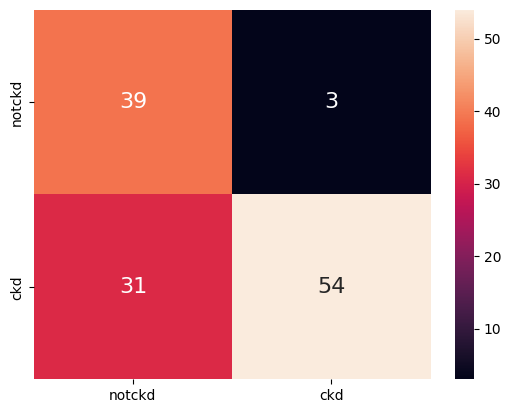

In [142]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier()

modelo_knn.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_knn.predict(X_teste)

import seaborn as sns
from sklearn.metrics import confusion_matrix

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao)

df_conf = pd.DataFrame(matriz_conf, ["notckd", "ckd"], ["notckd", "ckd"])

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

In [143]:
from sklearn.metrics import accuracy_score
accuracy_KNN = accuracy_score(y_verdadeiro, y_previsao)
print(f'Acurácia de {round(accuracy_KNN*100,3)}%')

Acurácia de 73.228%


<Axes: >

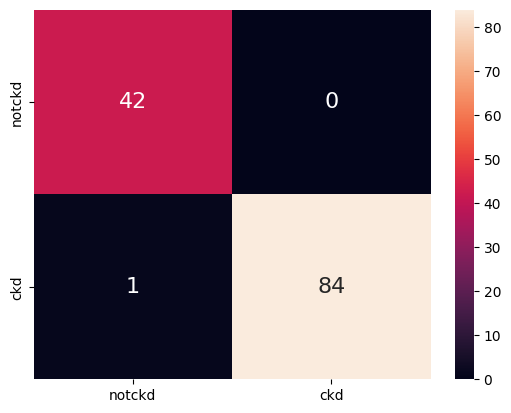

In [144]:
from sklearn.ensemble import RandomForestClassifier

N_ARVORES = 50
N_JOBS = 1

modelo_rf = RandomForestClassifier(    
    n_estimators=N_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=N_JOBS,)

modelo_rf.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao)


df_conf = pd.DataFrame(matriz_conf, ["notckd", "ckd"], ["notckd", "ckd"])

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

In [145]:
from sklearn.metrics import accuracy_score
accuracy_RF = accuracy_score(y_verdadeiro, y_previsao)
print(f'Acurácia de {round(accuracy_RF*100,3)}%')

Acurácia de 99.213%
